In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import re

In [2]:
# Reading the chat data
chat_path = 'Kissan_Express/_chat.txt'
with open(chat_path, 'r', encoding='utf-8') as file:
    lines = file.readlines()

data = []
for line in lines:
    if ']' in line:
        date_time, info = line.split(']', 1)
        date, time = date_time.strip('[').split(', ')
        if ':' in info:
            sender, message = info.split(':', 1)
            data.append({'date': date, 'time': time, 'sender': sender.strip(), 'message': message.strip()})

# Create a DataFrame
df = pd.DataFrame(data)
print(df.head(20))

            date         time                    sender  \
0     14/09/2022  12:21:09 AM       Kissan Express News   
1     14/09/2022  12:21:09 AM            ~ Ahmad Naseer   
2     13/06/2024   2:49:04 PM       Kissan Express News   
3     13/06/2024   2:49:04 PM       Kissan Express News   
4     13/06/2024   4:47:07 PM         ‪+92 308 4210534‬   
5     13/06/2024   5:53:08 PM         ‪+92 300 0934288‬   
6     14/06/2024   2:47:58 PM         ‪+92 300 7761939‬   
7     14/06/2024   5:01:13 PM         ‪+92 301 9477800‬   
8     14/06/2024   9:48:13 PM         ‪+92 300 9687170‬   
9   ‎[15/06/2024   4:12:55 AM    ~ Anwar Ahmed Treading   
10    15/06/2024   1:12:46 PM         ~ umarkhokhar2005   
11    15/06/2024   4:15:13 PM         ‪+92 301 8167977‬   
12    16/06/2024   4:48:54 PM         ‪+92 309 9990034‬   
13    16/06/2024   9:12:06 PM  ~ مخدوم سیدمحمدشاہ بخاری   
14    17/06/2024   4:27:00 PM         ‪+92 310 4344149‬   
15    17/06/2024  10:39:53 PM          ~ Rana Mahmood❤️ 

Active users: 31
Top 20 active users:
sender
~ Nadeem Bhatti Bhatti             30
~ Master Falak Sher                28
~ Ahmad Naseer                     20
~ Muhammad Usman                   17
~ Anwar Ahmed Treading             17
~ Rana Shahzad                     15
~ Shahzad Ahmad                    14
~ Kashif Ameer Bhatti              13
~ Zubair Shakoor                   12
~ Malik Zawar Hussein Bhatti       10
~ fazzalellahi1                     9
~ Sharafat Ali                      7
~ KALEEM ULLAH ینگ جرنلسٹ ✍🏻        7
~ Aziz Ur Rehman 🥰                  6
~ Muhammad Saleem Dogar             6
~ عرفان                             5
~ Nek Muhammad                      5
~ Mian Amjad Ali Zia (Mian Jee)     5
~ Khalid Tufail Gujjar              5
~ khurramnaveed321                  4
Name: count, dtype: int64


/Users/muhammadsaad/Library/Python/3.12/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127995 (\N{EMOJI MODIFIER FITZPATRICK TYPE-1-2}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/muhammadsaad/Library/Python/3.12/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 129392 (\N{SMILING FACE WITH SMILING EYES AND THREE HEARTS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


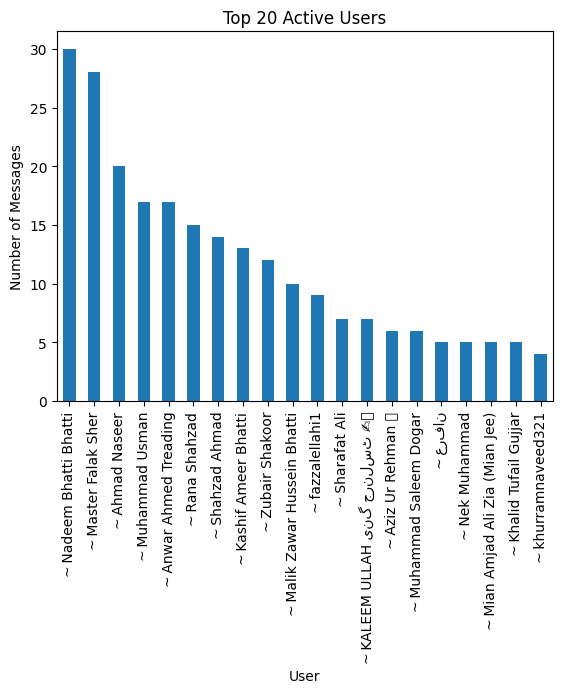

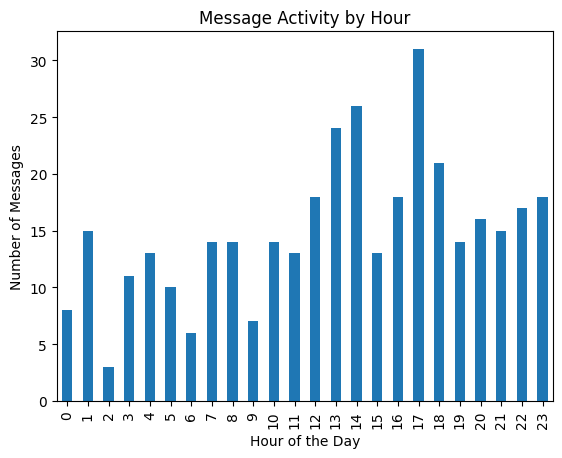

In [3]:
active_users = df['sender'].value_counts().loc[lambda x: x > 2].count()  # Adjust threshold as needed
print(f"Active users: {active_users}")

# Counting messages by user and displaying top 20 active users
user_activity = df['sender'].value_counts().head(20)
print("Top 20 active users:")
print(user_activity)

# Plotting the top 20 active users
user_activity.plot(kind='bar')
plt.xlabel('User')
plt.ylabel('Number of Messages')
plt.title('Top 20 Active Users')
plt.show()

# Time of Posting
df['hour'] = pd.to_datetime(df['time'], format='%I:%M:%S %p').dt.hour
hourly_activity = df['hour'].value_counts().sort_index()

# Plot hourly activity
hourly_activity.plot(kind='bar')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Messages')
plt.title('Message Activity by Hour')
plt.show()

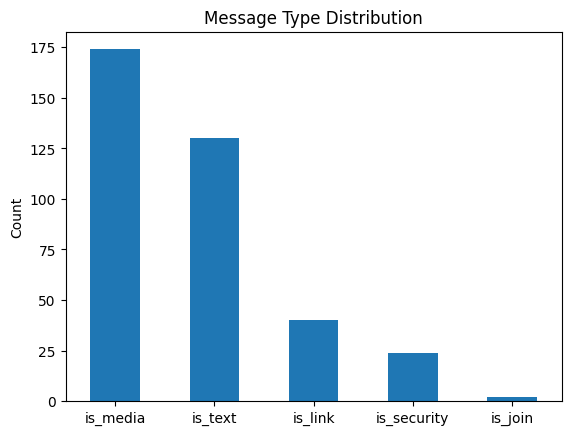

In [4]:
df['is_join'] = df['message'].str.contains('joined using this group\'s invite link', case=False)
df['is_security'] = df['message'].str.contains('security code with', case=False)
df['is_media'] = df['message'].str.contains('<attached:', case=False)
df['is_link'] = df['message'].str.contains('http')

url_regex = r'https?://\S+|www\.\S+'
attachment_regex = r'[\u200e\u200f\u202a\u202c]*<attached:.*?>[\u200e\u200f\u202a\u202c]*'
df['text_without_attachments_or_links'] = df['message'].str.replace(attachment_regex, '', regex=True).str.replace(url_regex, '', regex=True).str.strip()
df['is_text'] = ~(df['is_join'] | df['is_security']) & df['text_without_attachments_or_links'].apply(lambda x: len(x) > 0 and not x.isspace())

# Plotting message type distribution
msg_type_counts = df[['is_media', 'is_text', 'is_link', 'is_security', 'is_join']].sum()
msg_type_counts.plot(kind='bar')
plt.title('Message Type Distribution')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

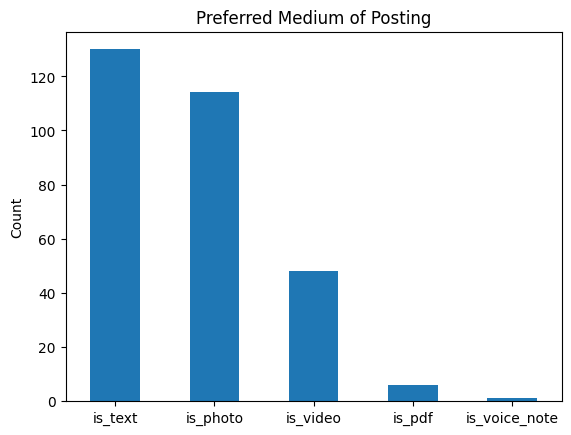

In [5]:
# Medium Analysis
df['is_photo'] = df['message'].str.contains('<attached: .*\\.jpg>', case=False)
df['is_video'] = df['message'].str.contains('<attached: .*\\.mp4>', case=False)
df['is_pdf'] = df['message'].str.contains('<attached: .*\\.pdf>', case=False)
df['is_voice_note'] = df['message'].str.contains('<attached: .*\\.opus>', case=False)  # Adjusted file extension for voice notes

# Plotting medium analysis
medium_counts = df[['is_text', 'is_photo', 'is_video', 'is_pdf', 'is_voice_note']].sum()
medium_counts.plot(kind='bar')
plt.title('Preferred Medium of Posting')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

Link Distribution Across Platforms:
link_type
Facebook    24
YouTube      8
TikTok       5
WhatsApp     2
Other        1
Name: count, dtype: int64


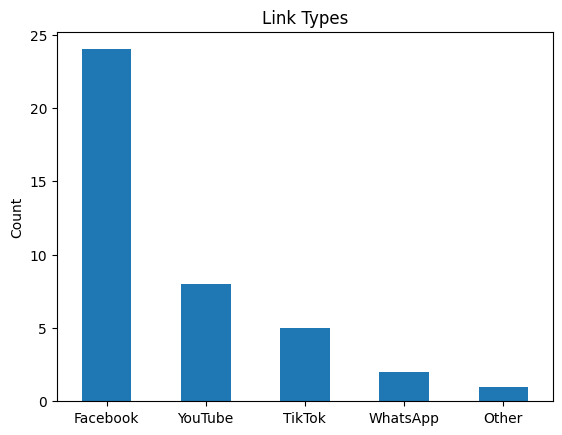

In [10]:
def classify_link(url):
    if 'youtu' in url:
        return 'YouTube'
    elif 'tiktok' in url:
        return 'TikTok'
    elif 'facebook' in url:
        return 'Facebook'
    elif 'whatsapp' in url or 'wa.me' in url:
        return 'WhatsApp'
    else:
        return 'Other'

df['link_type'] = df['message'].apply(lambda x: classify_link(x) if 'http' in x else 'No Link')
link_summary = df['link_type'].value_counts().drop('No Link', errors='ignore')  # Ignore errors if 'No Link' does not exist

# Display link summary and plot
print("Link Distribution Across Platforms:")
print(link_summary)

link_summary.plot(kind='bar')
plt.title('Link Types')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.xlabel('')
plt.show()


In [7]:
# Write all text messages to a text.txt file in the current directory
# Messages should be numbered and separated by newlines
text_messages = df.loc[df['is_text'], 'message']
with open('Kissan_Express/text.txt', 'w', encoding='utf-8') as file:
    for idx, message in enumerate(text_messages, 1):
        file.write(f"{idx}. {message}\n")

In [8]:
# Write all links to a links.txt file in the current directory
# Links should be numbered and separated by newlines
links = df.loc[df['link_type'] != 'No Link', 'message']
with open('Kissan_Express/links.txt', 'w', encoding='utf-8') as file:
    for idx, link in enumerate(links, 1):
        file.write(f"{idx}. {link}\n")

In [9]:
# Write all media messages to a media.txt file in the current directory
# Media messages should be numbered and separated by newlines
media_messages = df.loc[df['is_photo'] | df['is_video'] | df['is_voice_note'], 'message']
with open('Kissan_Express/media.txt', 'w', encoding='utf-8') as file:
    for idx, message in enumerate(media_messages, 1):
        file.write(f"{idx}. {message}\n")